# Create a crowd of pedestrians with custom statistics

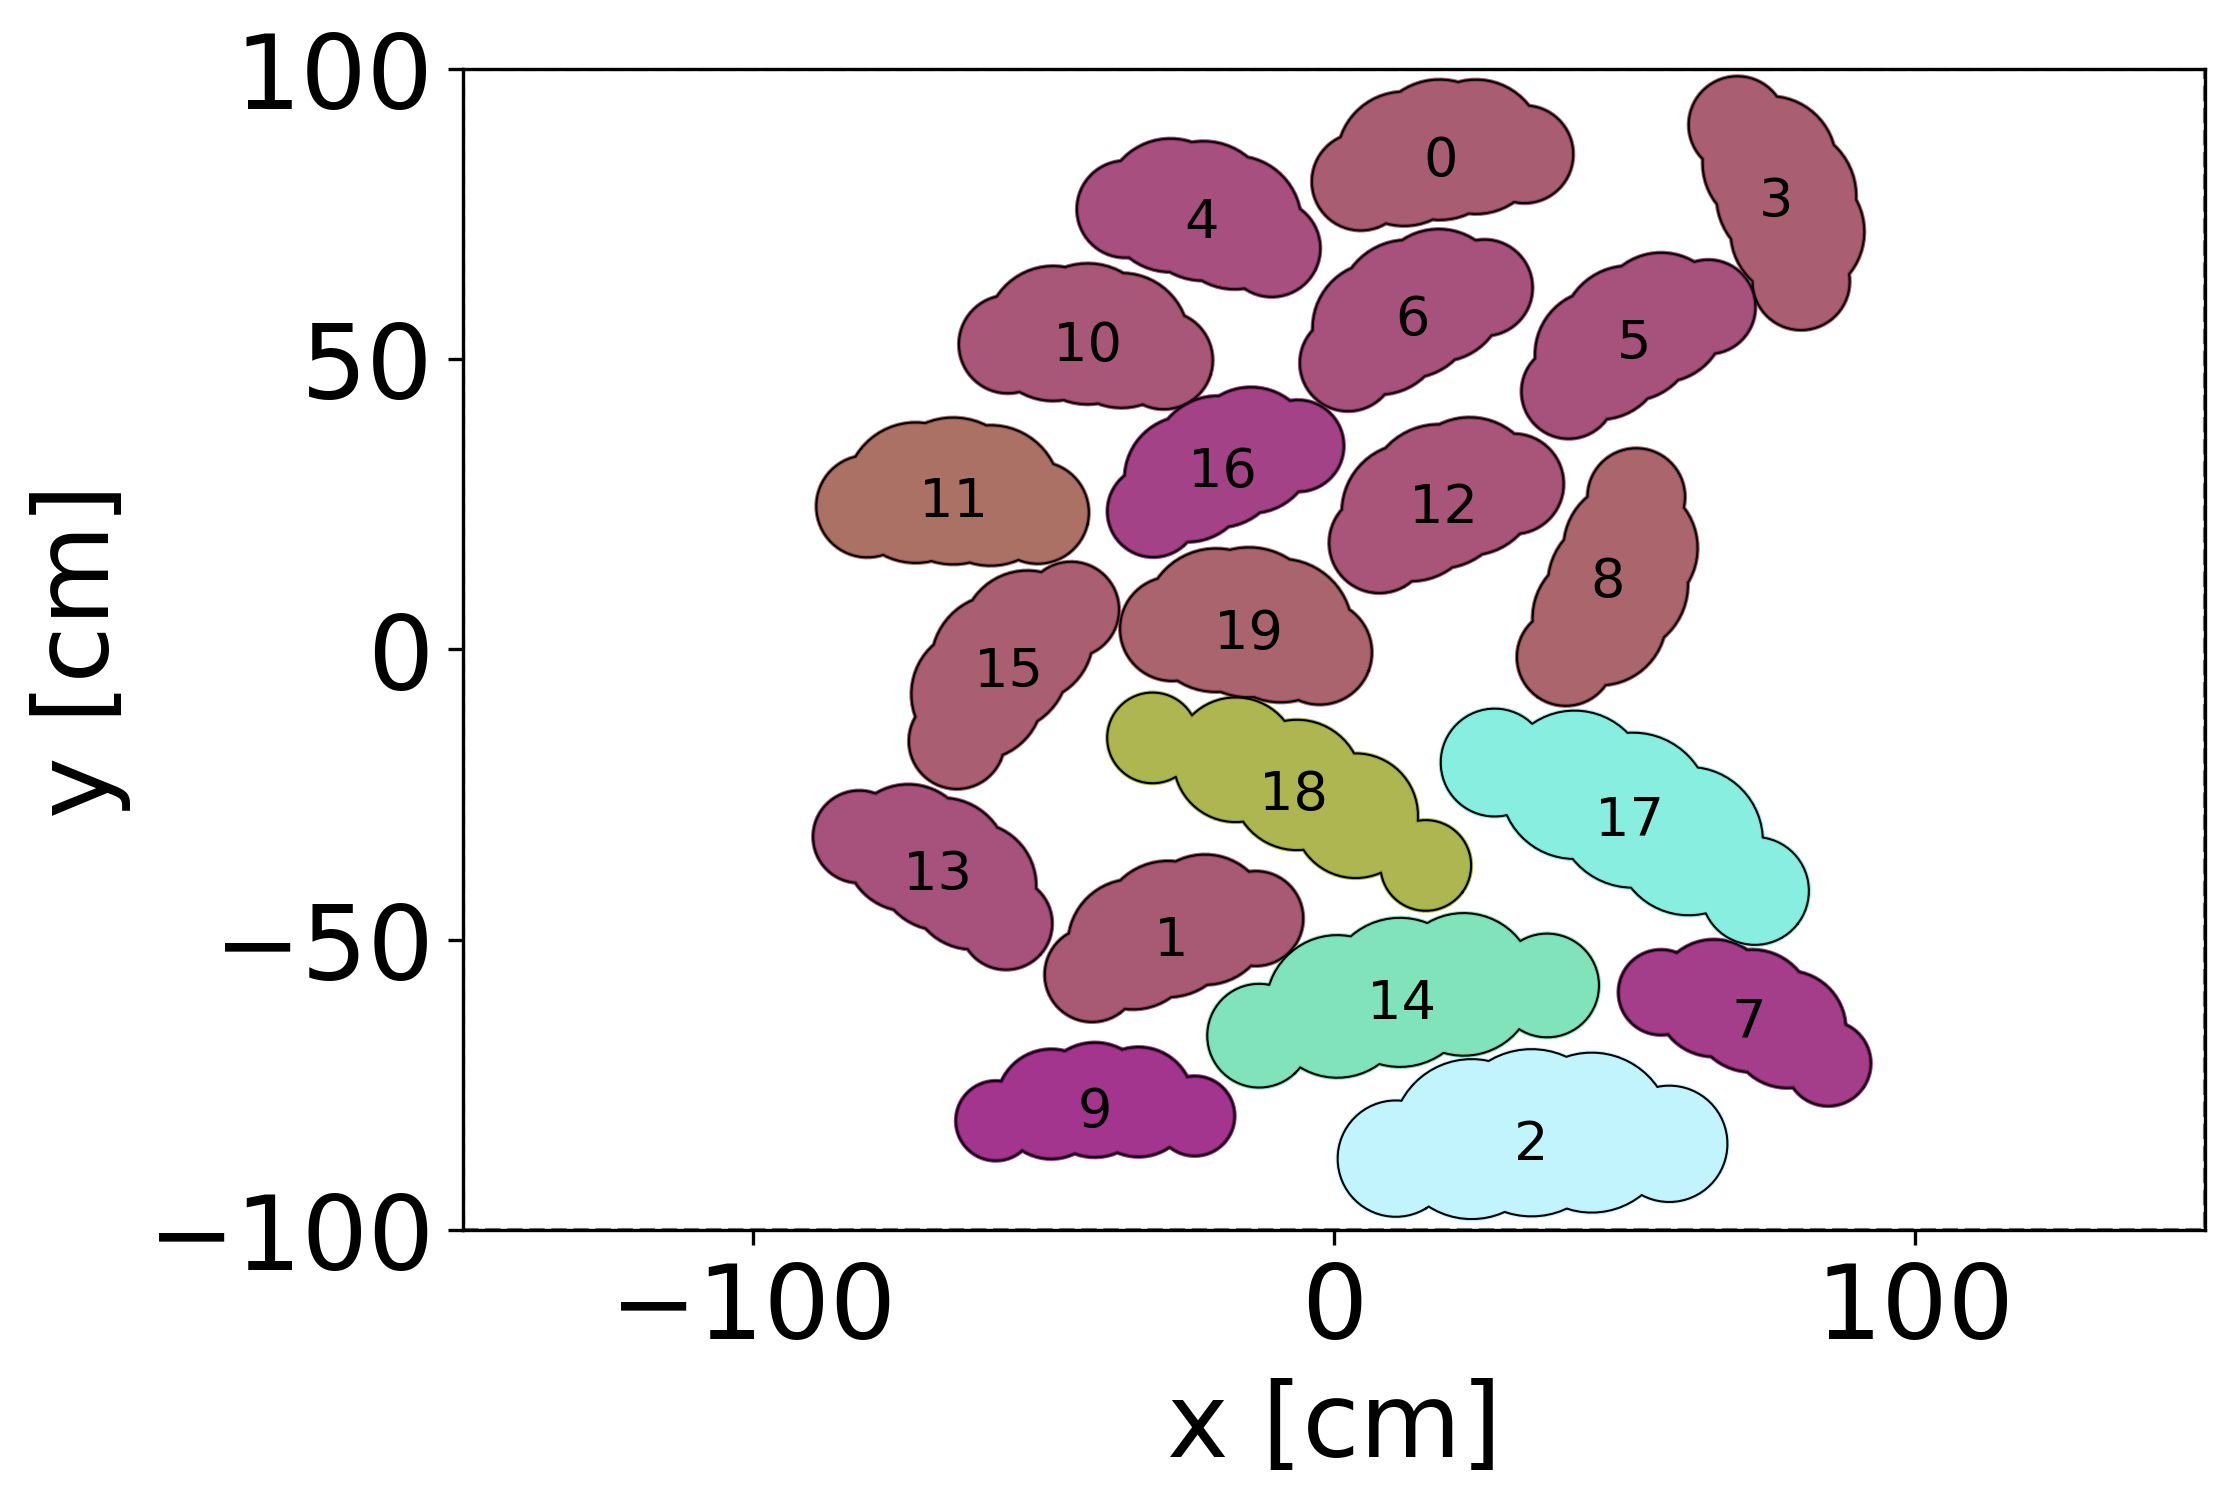

In [1]:
import matplotlib.pyplot as plt
from streamlit_app.plot import plot
from shapely.geometry import Polygon
from pathlib import Path

import configuration.utils.constants as cst
import configuration.backup.crowd_to_zip_and_reverse as fun_zip
from configuration.models.crowd import Crowd
from configuration.models.measures import CrowdMeasures

%matplotlib inline

# Constants
boundaries = Polygon([(-150.0, -100.0), (150.0, -100.0), (150.0, 100.0), (-150.0, 100.0)])  # (cm)
NUMBER_AGENTS: int = 20
REPULSION_LENGTH: float = 5.0  # (cm)
DESIRED_DIRECTION: float = 90.0  # (degrees)
RANDOM_PACKING: bool = True
agent_statistics = cst.CrowdStat.copy()

# Override specific values with st.session_state where applicable
agent_statistics.update(
    {
        "male_proportion": 0.2,
        "male_bideltoid_breadth_mean": 70.0,  # cm
        "male_bideltoid_breadth_std_dev": 3.0,  # cm
    }
)

# Create the packed crowd
crowd_measures = CrowdMeasures(agent_statistics=agent_statistics)
crowd = Crowd(boundaries=boundaries, measures=crowd_measures)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(repulsion_length=REPULSION_LENGTH, desired_direction=DESIRED_DIRECTION, random_packing=RANDOM_PACKING)

# Visualize results
plot.display_crowd2D(crowd)
plt.show()

# Download the xml configuration files necessary for the simulation to a zip format
output_zip_path = Path.cwd().parent.parent.parent / "data" / "xml" / "crowd_custom.zip"
fun_zip.save_crowd_data_to_zip(crowd, output_zip_path)

## Get some anthropometric statistics from the created crowd

In [2]:
import configuration.utils.functions as fun
import pprint

crowd_statistics = crowd.get_crowd_statistics()

# Print the crowd statistics
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["measures"]))

{'bike_proportion': 0.0,
 'female_bideltoid_breadth_max': 48.01473855073411,
 'female_bideltoid_breadth_mean': 45.03865267690979,
 'female_bideltoid_breadth_min': 42.50445190012648,
 'female_bideltoid_breadth_std_dev': 1.681958811068484,
 'female_chest_depth_max': 25.81881760972281,
 'female_chest_depth_mean': 23.57803959847704,
 'female_chest_depth_min': 19.75131618562533,
 'female_chest_depth_std_dev': 1.4909057883271795,
 'male_bideltoid_breadth_max': 68.55770832486662,
 'male_bideltoid_breadth_mean': 67.87566565570943,
 'male_bideltoid_breadth_min': 67.19780990054875,
 'male_bideltoid_breadth_std_dev': 0.6177830611572633,
 'male_chest_depth_max': 28.806622563818582,
 'male_chest_depth_mean': 25.91188384307095,
 'male_chest_depth_min': 22.447269984447065,
 'male_chest_depth_std_dev': 2.6505042071603877,
 'male_proportion': 0.2,
 'pedestrian_proportion': 1.0,
 'pedestrian_weight_max': 83.15076245773909,
 'pedestrian_weight_mean': 71.72770336794706,
 'pedestrian_weight_min': 64.440160